In [1]:
import ot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.base import clone
import seaborn as sns
from tqdm import tqdm, tqdm_notebook
from utils import construct_confidence_interval

import sklearn
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler
from sklearn.model_selection import ShuffleSplit

### Generate the problem / prepare selected datasets

In [2]:
nrows = None
random_seed=43 #tri topora

In [3]:
def load_merged_dataset():
    """
    Function to load the adult income dataset
    
    Returns: X, y, protected_attribute
    """
    numerical_features_index = [0, 2, 4, 10, 11, 12]

    data_train = pd.read_csv('../datasets/Adult income dataset/adult.data', nrows=nrows, header=None)
    y_train = data_train.loc[:, data_train.columns[-1]]
    gender_train = data_train.loc[:, data_train.columns[9]]


    data_test = pd.read_csv('../datasets/Adult income dataset/adult.test', skiprows=1, header=None)
    y_test = data_test.loc[:, data_train.columns[-1]]
    gender_test = data_test.loc[:, data_test.columns[9]]

    data = pd.concat((data_train, data_test))
    
    data.drop(data.columns.difference(numerical_features_index), axis=1, inplace=True)
    data = data.astype(np.float64)


    gender_train = gender_train.apply(lambda x: x.strip())
    
    data.drop_duplicates(inplace=True)
#     y_train = y_train.loc[data_train.index]
#     gender_train = gender_train.loc[data_train.index]

    #assert data_train.shape[0] == y_train.shape[0] == gender_train.shape[0]
    
    binarizer = LabelBinarizer()
    y_train = binarizer.fit_transform(y_train).ravel()
    y_test = binarizer.fit_transform(y_test).ravel()

    gender_binarizer = LabelBinarizer()
    gender_binary_train = gender_binarizer.fit_transform(gender_train.values).ravel()
    gender_binary = gender_binarizer.fit_transform(gender_test.values).ravel()

    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    
    return data, np.concatenate((y_train, y_test)), np.concatenate((gender_binary_train, gender_binary))

In [4]:
#data, y_data, gender_all = load_merged_dataset()

In [5]:
#shuffle_splitter = ShuffleSplit(n_splits=10, test_size=0.4, random_state=random_seed)

In [6]:
# for train_index, test_index in shuffle_splitter.split(data):
#     data_train, data_test = data[train_index], data[test_index]
#     y_train, y_test = y_data[train_index], y_data[test_index]
#     gender_train, gender_test = gender_all[train_index], gender_all[test_index]
#     break

In [7]:
numerical_features_index = [0, 2, 4, 10, 11, 12]

data_train = pd.read_csv('../datasets/Adult income dataset/adult.data', nrows=nrows, header=None)
y_train = data_train.loc[:, data_train.columns[-1]]
gender_train = data_train.loc[:, data_train.columns[9]]


data_test = pd.read_csv('../datasets/Adult income dataset/adult.test', skiprows=1, header=None)
y_test = data_test.loc[:, data_train.columns[-1]]
gender_test = data_test.loc[:, data_test.columns[9]]

data_train.drop(data_train.columns.difference(numerical_features_index), axis=1, inplace=True)
data_test.drop(data_test.columns.difference(numerical_features_index), axis=1, inplace=True)
data_train = data_train.astype(np.float64)
data_test = data_test.astype(np.float64)


gender_train = gender_train.apply(lambda x: x.strip())
gender_test = gender_test.apply(lambda x: x.strip())

In [8]:
data_train.drop_duplicates(inplace=True)
y_train = y_train.loc[data_train.index]
gender_train = gender_train.loc[data_train.index]

assert data_train.shape[0] == y_train.shape[0] == gender_train.shape[0]

y_def_train = y_train
y_def_test = y_test

binarizer = LabelBinarizer()
y_train = binarizer.fit_transform(y_train).ravel()
y_test = binarizer.fit_transform(y_test).ravel()

gender_binarizer = LabelBinarizer()
gender_train = gender_binarizer.fit_transform(gender_train.values).ravel()
gender_test = gender_binarizer.fit_transform(gender_test.values).ravel()

scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter

/home/grapefroot/datascience3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# clf_base = RandomForestClassifier()#random_state=random_seed)

# param_grid = {
#     'n_estimators': [10, 50, 100, 200, 500, 1000],
#     'max_depth': [None, 2, 3, 4, 5, 6],
#     'min_samples_split': [2, 3, 4, 5]
# }

In [12]:
# clf_base = GradientBoostingClassifier()

# param_grid = {
#     'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
#     'n_estimators': [100, 200, 500, 1000],
#     'min_samples_split': [2, 3, 4, 5],
#     'max_depth':[None, 2, 3, 4, 5, 6]
# }

In [13]:
clf_base = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C':[0.1, 0.2, 0.5, 1],
}

In [14]:
from sklearn.metrics import f1_score

In [15]:
clf = GridSearchCV(clf_base, param_grid, scoring='f1', n_jobs=-1, verbose=1, refit=True)
clf.fit(data_train, y_train)
clf_predictions = clf.predict(data_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.7s finished


In [16]:
clf.best_estimator_

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
print(Counter(y_test))

print(Counter(clf_predictions))

Counter({0: 12435, 1: 3846})
Counter({0: 14123, 1: 2158})


In [18]:
print('Initial accuracy of classification: {}'.format(accuracy_score(y_test, clf_predictions)))

Initial accuracy of classification: 0.8134021251765862


In [19]:
negative_label = 0
positive_label = 1

In [20]:
male_entries_index = gender_train[gender_train == positive_label]
female_entries_index = gender_train[gender_train == negative_label]

male_entries_test_index = gender_test[gender_test == positive_label]
female_entries_test_index = gender_test[gender_test == negative_label]

In [21]:
n0 = data_train[gender_train == positive_label].shape[0]
n1 = data_train[gender_train == negative_label].shape[0]
n0_test = data_test[gender_test == positive_label].shape[0]
n1_test = data_test[gender_test == negative_label].shape[0]

emperical_histogram_male = np.ones_like(male_entries_index) / n0
emperical_histogram_female = np.ones_like(female_entries_index) / n1

emperical_histogram_male_test = np.ones_like(male_entries_test_index) / n0_test
emperical_histogram_female_test = np.ones_like(female_entries_test_index) / n1_test

In [22]:
C = ot.dist(data_test[gender_test == positive_label], data_test[gender_test == negative_label])

In [23]:
def f(G):
    return 0.5 * np.sum(G**2)


def df(G):
    return G

In [24]:
coupling1 = ot.optim.gcg(emperical_histogram_male_test, emperical_histogram_female_test, C, reg1=1e-3, reg2=1e-1, f=f, df=df, verbose=True)
%time
#coupling1 = ot.stochastic.solve_semi_dual_entropic(emperical_histogram_male_test, emperical_histogram_female_test, C, reg=1, method='SAG', numItermax=100000, log=True)[0]

It.  |Loss        |Delta loss
--------------------------------
    0|1.186516e+01|0.000000e+00


/home/grapefroot/datascience3/lib/python3.6/site-packages/ot/bregman.py:370: RuntimeWarning: divide by zero encountered in true_divide
  v = np.divide(b, KtransposeU)
/home/grapefroot/datascience3/lib/python3.6/site-packages/ot/bregman.py:370: RuntimeWarning: overflow encountered in true_divide
  v = np.divide(b, KtransposeU)


    1|1.186052e-01|-9.903910e+01
    2|1.185269e-03|-9.906612e+01
    3|1.152485e-05|-1.018446e+02
    4|-2.080268e-07|-5.640080e+01
    5|-3.253101e-07|-3.605275e-01
    6|-3.264824e-07|-3.590933e-03
    7|-3.264942e-07|-3.589408e-05
    8|-3.264943e-07|-3.588011e-07
    9|-3.264943e-07|-3.586604e-09
   10|-3.264943e-07|-3.587646e-11
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs


In [25]:
%%time
coupling = ot.emd(emperical_histogram_male_test, emperical_histogram_female_test, C, numItermax=1000000000)

CPU times: user 30 s, sys: 700 ms, total: 30.7 s
Wall time: 30.6 s


In [26]:
num = 100

In [27]:
y_first = y_test[gender_test == positive_label]
y_second = y_test[gender_test == negative_label]
print('class 0 size {}'.format(y_first.shape))
print('class 1 size {}'.format(y_second.shape))

class 0 size (10860,)
class 1 size (5421,)


In [28]:
from mapper import full_repair, partial_repair, random_repair_original
from utils import balanced_error_rate, disparate_impact, likelihood_ratio

In [29]:
def subsample_maps(num_samples, num_couplings, data_first, data_second, y_first, y_second, coupling_function):
    assert num_samples < min(len(data_first, data_second))
    index_1 = np.random.choice(np.arange(0, len(data_first)), size=num_samples, replace=False)
    index_2 = np.random.choice(np.arange(0, len(data_second)), size=num_samples, replace=False)
    couplings = []
    for coupling_index in range(num_couplings):
        coupling = coupling_function(data_first[index_1], data_second[index_2], y_first[index_1], y_second[index_2])
        couplings.append(coupling)
    return couplings

In [30]:
def evaluate_metrics(y_true, y_predicted, protected_variable, fairness_metrics, accuracy_metrics, verbose=False):
    """
    y : np.array[n] - target variable or output of classifier
    protected_variable: np.array[n] - binary protected variable
    metrics: dict the value of metrics to evaluate.
    Each must take the y and protected_variable as arguments
    """
    predicted_fairness_dict = {metric_name : metric_func(y_predicted, protected_variable) for (metric_name, metric_func) in fairness_metrics.items()}
    target_fairness_dict = {'{}_target'.format(metric_name): metric_func(y_true, protected_variable) for (metric_name, metric_func) in fairness_metrics.items()}
    accuracy_dict = {metric_name: metric_func(y_true, y_predicted) for (metric_name, metric_func) in accuracy_metrics.items()}
    return {**predicted_fairness_dict, **target_fairness_dict, **accuracy_dict}

In [31]:
from functools import partial

In [32]:
predicted_fairness_dict = {
    'DI': disparate_impact,
    'CI': partial(construct_confidence_interval, level=0.95),
}

accuracy_metrics_dict = {
    'Accuracy': accuracy_score,
}

In [33]:
from collections import defaultdict
from tqdm import tqdm

In [34]:
def evaluate_repair(conditional_0, conditional_1, y_first, y_second, repair_funciton, clf, name):
    """
    Name:str - name of the method to repair
    Returns:
    Dict containing a list for every metric
    """
    metrics_values = defaultdict(list)
    metrics_values['name'] = name
    for repair_value in tqdm(np.linspace(0, 1, num=num)):
        X_new, y_new = repair_funciton(repair_value, conditional_0, conditional_1, y_first, y_second)
        y_predicted = clf.predict(X_new)
        metrics_value = evaluate_metrics(y_new, y_predicted, gender_test, predicted_fairness_dict, accuracy_metrics_dict)
        for key, value in metrics_value.items():
            metrics_values[key].append(value)
    return metrics_values

In [35]:
partial_repair_func = lambda rv, c0, c1, y0, y1: partial_repair(rv, c0 ,c1, coupling, y0, y1)
random_repair_func = lambda rv, c0, c1, y0, y1: random_repair_original(c0, c1, coupling, y0, y1, theta=rv)
partial_repair_reg_func = lambda rv, c0, c1, y0, y1: partial_repair(rv, c0 ,c1, coupling1, y0, y1)
random_repair_reg_func = lambda rv, c0, c1, y0, y1: random_repair_original(c0, c1, coupling1, y0, y1, theta=rv)

In [36]:
evaluation_1 = evaluate_repair(data_test[gender_test == positive_label], data_test[gender_test == negative_label], y_first, y_second, partial_repair_func, clf, name='full ot')

100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


In [37]:
evaluation_2 = evaluate_repair(data_test[gender_test == positive_label], data_test[gender_test == negative_label], y_first, y_second, random_repair_func, clf, name='random repair full ot')#

100%|██████████| 100/100 [00:43<00:00,  2.29it/s]


In [38]:
evaluation_3 = evaluate_repair(data_test[gender_test == positive_label], data_test[gender_test == negative_label], y_first, y_second, partial_repair_reg_func, clf, name='entropically regularized ot')

100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


In [39]:
evaluation_4 = evaluate_repair(data_test[gender_test == positive_label], data_test[gender_test == negative_label], y_first, y_second, random_repair_reg_func, clf, name='random repair regularized ot')

100%|██████████| 100/100 [00:43<00:00,  2.30it/s]


In [40]:
def plot_metrics(metric_dicts, what_to_plot=None):
    """
    Metric dicts: List[dict] - list of dictionaries corresponding to metrics
    what_to_plot: List[str] - list of metric names
    """
    if not isinstance(metric_dicts, list):
        metric_dicts = [metric_dicts]
        
    if what_to_plot is None:
        what_to_plot = list(metric_dicts[0].keys() - ['name'])
        
    if not isinstance(what_to_plot, list):
        what_to_plot = [what_to_plot]
    
    fix, axes = plt.subplots(nrows=len(what_to_plot), ncols=1, figsize=(10, 10*len(what_to_plot)))
    
    for subplot_index, metric_name in enumerate(what_to_plot):
        for entry in metric_dicts:
            values = entry[metric_name]
            axes[subplot_index].set_title(metric_name)
            
            if metric_name.startswith('CI'):
                tn, lower, upper = zip(*values)
                axes[subplot_index].plot(np.linspace(0, 1, num=len(values)), tn, label=entry['name'])
                axes[subplot_index].fill_between(np.linspace(0, 1, num=len(values)), upper, lower, alpha=0.5)
            else:    
                axes[subplot_index].plot(np.linspace(0, 1, num=len(values)), values, label=entry['name'])
            axes[subplot_index].legend()
    plt.show()

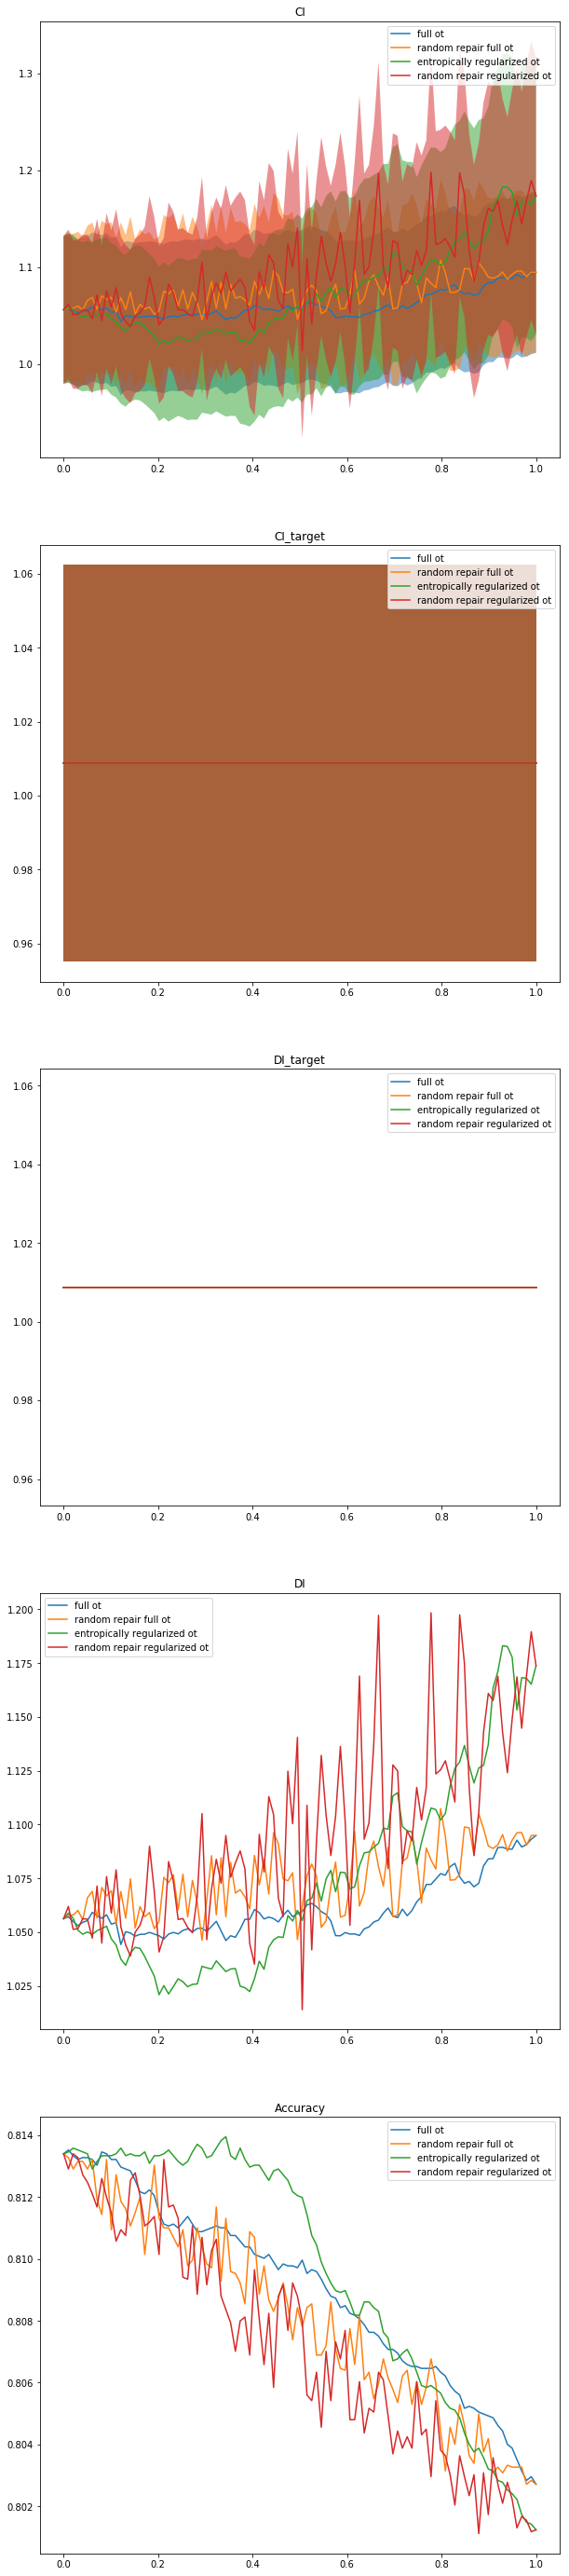

In [41]:
plot_metrics([evaluation_1, evaluation_2, evaluation_3, evaluation_4])

### Show that different solutions for the same transporation problem can have different target metric value

### Explore how the regularized barycenters are defined, try to apply them to the problem

### Use the regularized transport maps instead of usual ones